In [2]:
%run chapter\ 1.ipynb
%run chapter\ 2.ipynb
%run chapter\ 3.ipynb
%run chapter\ 4.ipynb
%run chapter\ 5.ipynb
%run chapter\ 6.ipynb
%run chapter\ 7.ipynb
%run chapter\ 10.ipynb

In [3]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=697)

In [11]:
%run chapter\ 10.ipynb
world = default_world()
world.contains = []
world.lights = [point_light(point(1.5, 4.8, 1.5), color(.1, .1, .1)),
                point_light(point(0, 4.8, 1.5), color(.1, .1, .1)),
                point_light(point(-1.5, 4.8, 1.5), color(.1, .1, .1)),
                point_light(point(1.5, 4.8, 0), color(.1, .1, .1)),
                point_light(point(0, 4.8, 0), color(.2, .2, .2)),
                point_light(point(-1.5, 4.8, 0), color(.1, .1, .1)),
                point_light(point(1.5, 4.8, -1.5), color(.1, .1, .1)),
                point_light(point(0, 4.8, -1.5), color(.1, .1, .1)),
                point_light(point(-1.5, 4.8, -1.5), color(.1, .1, .1))]

world.lights = [point_light(point(0, 4.5, 0), color(1, 1, 1))]

p1 = gradient_pattern(BLACK, BLACK)
p1.transform = matrix_multiply(translation(3,0,0), scaling(6,1,1))

p2 = stripe_pattern(color(1,0,0), color(1, 0.7, 0.8))
p2.transform = matrix_multiply(rotation_y(np.pi/4), scaling(0.15,1,1))

p3 = blended_pattern(blended_pattern(p1, p2), ring_pattern(color(0,0,1), color(0,0,0.1)))

p4 = stripe_pattern(WHITE, color(0.8, 0.8, 0.8))
p4.transform = matrix_multiply(rotation_y(-np.pi/4), scaling(0.1,1,1))

p5 = nested_pattern(p1, p2, p4)
p6 = checker_pattern(BLACK, WHITE)
p7 = perturbed_pattern(p5)

floor = plane()
floor.material.color = color(1, 0.9, 0.9)
floor.material.specular = 0
floor.material.pattern = p7

ceiling = plane()
ceiling.material = floor.material
ceiling.transform = translation(0,5,0)


back_wall = plane()
back_wall.transform = matrix_multiply(translation(0,0,3), rotation_x(np.pi/2))
back_wall.material = floor.material


left_wall = plane()
left_wall.material.color = color(1,0,0)
left_wall.material.specular = 0
left_wall.transform = matrix_multiply(translation(-3, 0, 0), rotation_z(-np.pi/2))


right_wall = plane()
right_wall.material.color = color(0,1,0)
right_wall.material.specular = 0
right_wall.transform = matrix_multiply(translation(3, 0, 0), rotation_z(np.pi/2))


middle = sphere()
middle.transform = translation(-0.5, 1, 0.5)
middle.material = material()
middle.material.color = color(0.1, 1, 0.5)
middle.material.diffuse = 0.7
middle.material.specular = 0.3
#middle.material.pattern = ring_pattern(color(0,0,1), color(1,1,0))
#middle.material.pattern.transform = scaling(0.1,0.1,0.1)

right = sphere()
right.transform = matrix_multiply(translation(1.5, 0.5, -0.5), scaling(0.5, 0.5, 0.5))
right.material = material()
right.material.color = color(0.5, 1, 0.1)
right.material.diffuse = 0.7
right.material.specular = 0.3


left = sphere()
left.transform = matrix_multiply(translation(-1.5, 0.33, -0.75), scaling(0.33, 0.33, 0.33))
left.material = material()
left.material.color = color(1, 0.8, 0.1)
left.material.diffuse = 0.7
left.material.specular = 0.3


world.contains.extend([floor, ceiling, left_wall, right_wall, back_wall, middle, right, left])


cam = camera(256, 256, np.pi/3)
t1 = (point(0, 2.0, -8), point(0, 2.0, 1), vector(0, 1, 0))
cam.transform = view_transform(*t1)


from datetime import datetime, timezone, timedelta
now = datetime.now(timezone.utc)
epoch = datetime(1970, 1, 1, tzinfo=timezone.utc) # use POSIX epoch
posix_timestamp_micros_before = (now - epoch) / timedelta(microseconds=1)

print('canvas construction start at {}'.format(now))
# render the result to a canvas.
ca = render_multi(cam, world, 4)


now = datetime.now(timezone.utc)
epoch = datetime(1970, 1, 1, tzinfo=timezone.utc) # use POSIX epoch
posix_timestamp_micros_after = (now - epoch) / timedelta(microseconds=1)
delta = posix_timestamp_micros_after - posix_timestamp_micros_before
print('canvas constructed in {} seconds.'.format(delta/1000000))


ppm = construct_ppm(ca)
print('ppm constructed')

with open('./cornellbox7.ppm', 'wb') as f:
    f.write(ppm)
print('ppm file written')

import PIL.Image as Image
from matplotlib.pyplot import imshow

%matplotlib inline
im = Image.open('./cornellbox7.ppm', 'r')
im.save('./cornellbox7.jpg')
imshow(im)

canvas construction start at 2019-08-30 13:58:30.928058+00:00
canvas constructed in 390.6006 seconds.
ppm constructed
ppm file written


FileNotFoundError: [Errno 2] No such file or directory: './cornellbox7.ppm'

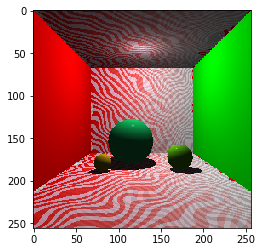

In [12]:
import PIL.Image as Image
from matplotlib.pyplot import imshow

%matplotlib inline
im = Image.open('./cornellbox6.ppm', 'r')
im.save('./cornellbox6.jpg')
imshow(im)